[ENGIE’s first open data windfarm](https://opendata-renewables.engie.com/)

[La Haute Borne Data (2017-2020)](https://opendata-renewables.engie.com/explore/dataset/01c55756-5cd6-4f60-9f63-2d771bb25a1a/table)

- [Data Descriptions](https://opendata-renewables.engie.com/explore/dataset/39490fd2-04a2-4622-9042-ce4dd34c2a58/information)

In [1]:
import pandas as pd
import numpy as np
import re
import pickle
import string

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Anomaly detection tools
from sklearn.ensemble import IsolationForest

# Display data tools
from IPython.display import display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Unpickle windfarm

In [2]:
windfarm2016 = pd.read_pickle("./windfarm2016.pkl")
windfarm2016

,Wind_turbine_name,Date_time,Dates,Time,year,month,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,Db1t_max,Db1t_std,Db2t_avg,Db2t_min,Db2t_max,Db2t_std,Dst_avg,Dst_min,Dst_max,Dst_std,Gb1t_avg,Gb1t_min,Gb1t_max,Gb1t_std,Gb2t_avg,Gb2t_min,Gb2t_max,Gb2t_std,Git_avg,Git_min,Git_max,Git_std,Gost_avg,Gost_min,Gost_max,Gost_std,Ya_avg,Ya_min,Ya_max,Ya_std,Yt_avg,Yt_min,Yt_max,Yt_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,Ws2_max,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Wa_avg,Wa_min,Wa_max,Wa_std,Va1_avg,Va1_min,Va1_max,Va1_std,Va2_avg,Va2_min,Va2_max,Va2_std,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
13872,R80736,2016-11-26T20:30:00+01:00,2016-11-26,19:30:00,2016,11,90.000000,90.000000,90.000000,0.00,16.040001,16.000000,17.00,0.15,4.21000,4.130000,4.28000,0.030000,25.370001,24.980000,25.680000,0.120000,-0.150000,-0.440000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.150000,0.000000,0.440000,0.080000,1.00,1.00,1.00,0.00,0.000000,0.000000,0.00000,0.000000,19.889999,19.700001,19.900000,0.04,16.830000,16.799999,17.000000,0.06,21.549999,21.400000,21.600000,0.08,26.100000,26.000000,26.100000,0.01,26.700001,26.700001,26.799999,0.01,25.420000,24.799999,25.600000,0.22,29.200001,29.100000,29.299999,0.01,234.030000,234.030000,234.030000,0.00,15.990000,15.800000,16.000000,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,133.670000,123.090000,143.130000,5.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.37,-110.940000,-90.900002,5.510000,9.00,8.8,9.05,0.02,50.000000,49.959999,50.029999,0.01,695.89001,694.01001,698.37000,0.81,0.000000,0.000000,0.00,0.00,17.299999,17.299999,17.400000,0.01,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN,133.670000,NaN,NaN,NaN,133.670000,NaN,NaN,NaN
13875,R80736,2016-11-26T22:30:00+01:00,2016-11-26,21:30:00,2016,11,90.000000,90.000000,90.000000,0.00,16.000000,16.000000,16.00,0.00,4.07000,4.030000,4.10000,0.010000,24.190001,23.980000,24.360001,0.060000,-0.130000,-0.430000,0.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.130000,0.000000,0.430000,0.070000,1.00,1.00,1.00,0.00,0.000000,0.000000,0.00000,0.000000,19.260000,19.100000,19.299999,0.07,16.200001,16.100000,16.200001,0.00,20.500000,20.400000,20.500000,0.01,25.299999,25.250000,25.500000,0.02,25.900000,25.850000,25.900000,0.01,24.570000,24.250000,24.799999,0.08,28.190001,28.100000,28.200001,0.02,234.030000,234.030000,234.030000,0.00,15.830000,15.800000,16.000000,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,150.060000,123.090000,205.460010,25.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.00,-110.930000,-28.559999,25.150000,8.66,8.5,8.75,0.07,50.020000,49.990002,50.040001,0.01,696.19000,693.65002,698.51001,1.47,0.000000,0.000000,0.00,0.00,17.000000,16.950001,17.000000,0.00,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN,150.060000,NaN,NaN,NaN,150.060000,NaN,NaN,NaN
13878,R80736,2016-11-30T00:40:00+01:00,2016-11-29,23:40:00,2016,11,45.000000,45.000000,45.000000,0.00,9.000000,9.000000,9.94,0.05,94.43000,73.129997,107.93000,8.530000,28.719999,28.450001,28.969999,0.080000,-1.310000,-1.780000,-0.930000,0.140000,0.000000,0.000000,0.090000,0.000000,1.310000,0.930000,1.780000,0.140000,1.00,1.00,1.00,0.00,90.470001,68.980003,104.04000,8.520001,41.369999,41.200001,41.599998,0.12,35.139999,34.900002,35.500000,0.14,54.889999,54.599998,55.400002,0.21,46.560001,46.400002,46.599998,0.07,47.500000,47.299999,47.700001,0.14,47.549999,47.200001,47.900002,0.15,49.990002,49.799999,50.200001,0.10,81.459999,81.459999,81.459999,0.00,21.459999,2

In [3]:
windfarm = pd.read_pickle("./windfarm.pkl")
windfarm

,Wind_turbine_name,Date_time,Dates,Time,year,month,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,Db1t_max,Db1t_std,Db2t_avg,Db2t_min,Db2t_max,Db2t_std,Dst_avg,Dst_min,Dst_max,Dst_std,Gb1t_avg,Gb1t_min,Gb1t_max,Gb1t_std,Gb2t_avg,Gb2t_min,Gb2t_max,Gb2t_std,Git_avg,Git_min,Git_max,Git_std,Gost_avg,Gost_min,Gost_max,Gost_std,Ya_avg,Ya_min,Ya_max,Ya_std,Yt_avg,Yt_min,Yt_max,Yt_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,Ws2_max,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Wa_avg,Wa_min,Wa_max,Wa_std,Va1_avg,Va1_min,Va1_max,Va1_std,Va2_avg,Va2_min,Va2_max,Va2_std,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
0,R80721,2017-02-08T08:00:00+01:00,2017-02-08,07:00:00,2017,2,44.990002,44.990002,44.990002,0.00,14.00,14.00,14.0,0.00,38.369999,17.6800,52.41000,9.390000,2.39,2.06,2.69,0.09,-1.89000,-2.36000,-1.40000,0.150000,0.000000,0.000000,0.000000,0.00,1.89000,1.40000,2.36000,0.15,1.00,1.0,1.00,0.0,38.110001,17.27,51.919998,9.400000,33.410000,33.200001,33.599998,0.14,30.790001,30.600000,30.850000,0.03,45.590000,45.299999,45.799999,0.11,35.360001,35.099998,35.599998,0.15,37.939999,37.799999,38.000000,0.08,34.130001,31.799999,35.700001,1.04,39.580002,39.049999,40.200001,0.40,318.12000,318.12000,318.12000,0.00,20.610001,20.500000,20.799999,0.08,0.14,0.00,1.94,0.44,0.22,0.00,1.93,0.53,0.18,0.00,1.89,0.44,358.049990,298.76999,54.560001,12.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.939999,-19.350000,96.449997,12.05,4.80,4.8,4.90,0.01,50.000000,49.959999,50.029999,0.01,698.40002,696.01001,708.03003,2.40,0.33,0.00,0.49,0.16,19.020000,19.0,19.100000,0.04,-18.889999,-438.32999,0.00000,79.82000,NaN,NaN,NaN,NaN,358.04999,NaN,NaN,NaN,358.04999,NaN,NaN,NaN
1,R80721,2017-01-26T02:40:00+01:00,2017-01-26,01:40:00,2017,1,-1.000000,-1.000000,-1.000000,0.00,10.00,10.00,10.0,0.00,1204.140000,1195.8101,1208.66000,3.260000,1796.71,1764.35,1816.86,10.58,197.32001,186.07001,200.96001,2.150000,22.200001,16.120001,25.110001,1.04,198.58000,186.92999,202.14999,2.17,0.99,1.0,0.99,0.0,1205.520000,1197.17,1210.060100,3.250000,40.639999,40.200001,41.099998,0.17,29.379999,29.150000,29.600000,0.08,54.580002,53.500000,55.799999,0.37,64.800003,64.550003,65.000000,0.08,64.400002,64.300003,64.599998,0.08,54.959999,54.700001,55.599998,0.12,56.209999,56.000000,56.450001,0.07,63.48000,63.48000,63.48000,0.00,21.900000,21.700001,22.200001,0.13,4.33,3.42,5.54,0.39,5.38,3.74,6.69,0.46,4.85,3.67,6.01,0.39,74.470001,9.47000,108.520000,9.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,-54.009998,45.029999,9.74,-7.16,-7.3,-6.90,0.11,50.009998,49.980000,50.029999,0.01,704.65997,703.42999,705.90002,0.45,11.48,11.37,11.54,0.03,21.610001,21.6,21.799999,0.03,1562.970000,1481.31010,1586.53000,13.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R80721,2017-01-26T13:50:00+01:00,2017-01-26,12:50:00,2017,1,-1.000000,-1.000000,-1.000000,0.00,10.00,10.00,10.0,0.00,1179.860000,1060.6200,1287.86000,49.009998,1662.15,1251.04,2029.50,164.30,176.45000,108.74000,245.96001,29.559999,18.620001,11.780000,24.469999,2.48,177.53000,110.14000,246.80000,29.35,0.99,1.0,0.98,0.0,1181.700000,1062.28,1289.950000,49.110001,49.509998,48.849998,50.099998,0.21,37.349998,37.000000,37.700001,0.13,63.990002,62.599998,65.500000,0.56,66.800003,66.099998,67.349998,0.27,66.290001,65.750000,66.900002,0.34,56.830002,56.450001,57.150002,0.11,58.570000,58.299999,59.049999,0.09,70.07000,70.07000,70.07000,0.00,27.410000,27.299999,27.700001,0.11,4.89,3.64,6.39,0.52,5.19,3.65,6.69,0.52,5.04,3.70,6.38,0.48,73.949997,328.78000,122.340000,13.83,NaN,NaN,NaN,NaN

In [4]:
# Append 2 dfs
windfarm = windfarm2016.append(windfarm)

In [5]:
windfarm['Date_time'] = pd.to_datetime(windfarm.Date_time, utc=True)

# Break up windfarm df into 4 - 1 per Turbine

In [7]:
windfarm.Wind_turbine_name.value_counts()

R80711    107131
R80721    107131
R80736    107131
R80790    106987
Name: Wind_turbine_name, dtype: int64

In [10]:
wf_R80721 = windfarm[windfarm['Wind_turbine_name']== 'R80721'].reset_index()

In [11]:
wf_R80721 = wf_R80721.drop(columns=['index'])

In [12]:
wf_R80711 = windfarm[windfarm['Wind_turbine_name']== 'R80711'].reset_index()

In [13]:
wf_R80711 = wf_R80711.drop(columns=['index'])

In [14]:
wf_R80736 = windfarm[windfarm['Wind_turbine_name']== 'R80736'].reset_index()

In [15]:
wf_R80736 = wf_R80736.drop(columns=['index'])

In [16]:
wf_R80790 = windfarm[windfarm['Wind_turbine_name']== 'R80790'].reset_index()

In [17]:
wf_R80790 = wf_R80790.drop(columns=['index'])

## Multivariate Anomaly Detection

In multivariate anomaly detection, outlier is a combined unusual score on at least two variables.

So, using two or more variables, we are going to build an unsupervised multivariate anomaly detection method based on several models.

We are using [PyOD](https://pyod.readthedocs.io/en/latest/) which is a Python library for detecting anomalies in multivariate data.

## S - Apparent_power (kVA): 
- Should be the square root of the sum of Active_power kW (P) squared and Reactive_power kVAr (Q) squared
    - So S & P and S & Q should both have positive correlations. 
- If some of the Apparent_power data points and Active_power data points or Reactive_power points are not positivey correlated, they would be considered as outliers and need further investigation.

- **__No outliers for Apparent_power and Active_power!__**


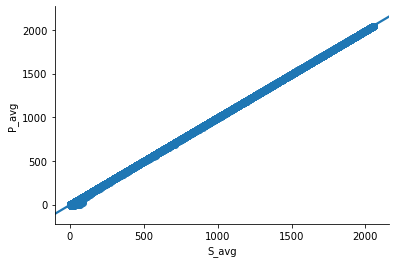

In [20]:
sns.regplot(x=wf_R80721['S_avg'], y=wf_R80721['P_avg'], data=wf_R80721)
sns.despine();

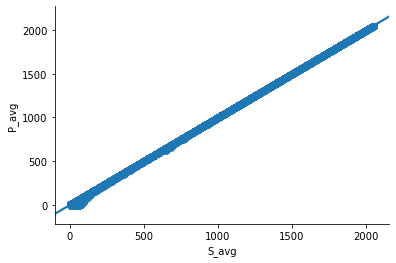

In [21]:
sns.regplot(x=wf_R80711['S_avg'], y=wf_R80711['P_avg'], data=wf_R80711)
sns.despine();

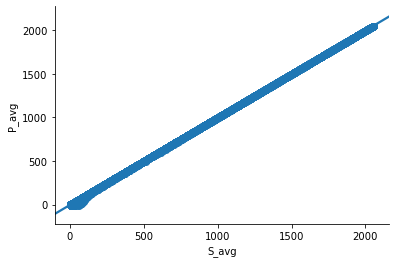

In [22]:
sns.regplot(x=wf_R80736['S_avg'], y=wf_R80736['P_avg'], data=wf_R80736)
sns.despine();

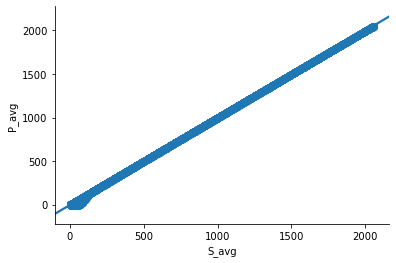

In [23]:
sns.regplot(x=wf_R80790['S_avg'], y=wf_R80790['P_avg'], data=wf_R80790)
sns.despine();

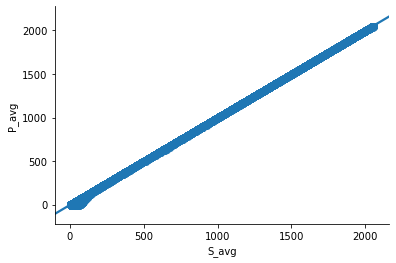

In [18]:
sns.regplot(x=windfarm['S_avg'], y=windfarm['P_avg'], data=windfarm)
sns.despine();

# S - Apparent_power (kVA) vs. Reactive_power kVAr (Q)

- S	Apparent_power (kVA) should be the square root of the sum of P square and Q square
- So So S & P and S & Q should both have positive correlations and outliers should not be present. 
- **__Most outliers for *R80711*__**

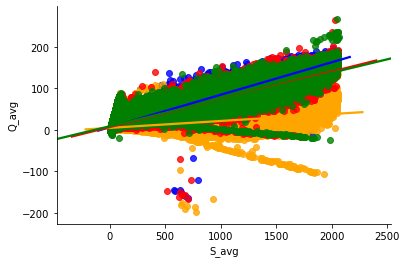

In [121]:
sns.regplot(x='S_avg', y='Q_avg', data=wf_R80721, color='Blue')
sns.despine();

sns.regplot(x='S_avg', y='Q_avg', data=wf_R80711, color='Orange')
sns.despine();

sns.regplot(x='S_avg', y='Q_avg', data=wf_R80736, color='Red')
sns.despine();

sns.regplot(x='S_avg', y='Q_avg', data=wf_R80790, color='Green')
sns.despine();

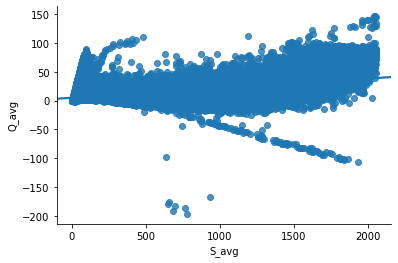

In [27]:
sns.regplot(x='S_avg', y='Q_avg', data=wf_R80711)
sns.despine();

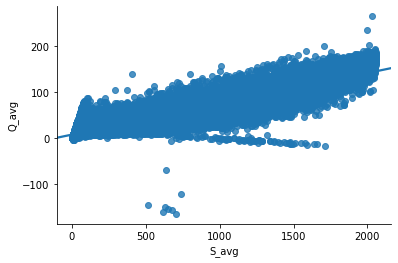

In [28]:
sns.regplot(x='S_avg', y='Q_avg', data=wf_R80736)
sns.despine();

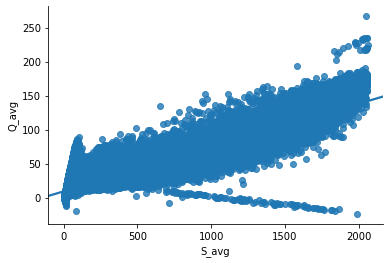

In [24]:
sns.regplot(x='S_avg', y='Q_avg', data=wf_R80790)
sns.despine();

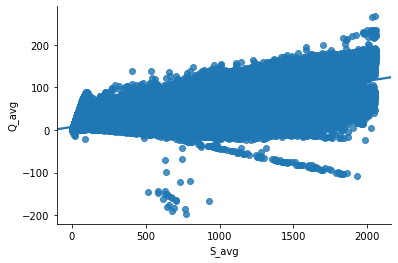

In [25]:
sns.regplot(x='S_avg', y='Q_avg', data=windfarm)
sns.despine();

**From the above correlation chart, we can see that a lot of the data points are obvious outliers both on the low and high end.**


Noise vs. outliers
- 

## For Wind Speed (Ws) and Rotor_speed (Rs):
- Would we expect a positive correlation between these?

- Appears there are outliers, but one wind turbine does not appear to have the majority of outliers

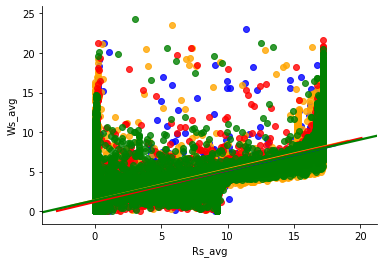

In [137]:
sns.regplot(x='Rs_avg', y='Ws_avg', data=wf_R80721, color='Blue')
sns.despine();

sns.regplot(x='Rs_avg', y='Ws_avg', data=wf_R80711, color='Orange')
sns.despine();

sns.regplot(x='Rs_avg', y='Ws_avg', data=wf_R80736, color='Red')
sns.despine();

sns.regplot(x='Rs_avg', y='Ws_avg', data=wf_R80790, color='Green')
sns.despine();

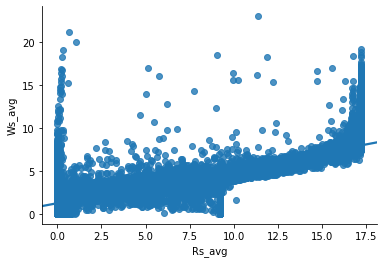

In [29]:
sns.regplot(x='Rs_avg', y='Ws_avg', data=wf_R80721)
sns.despine();

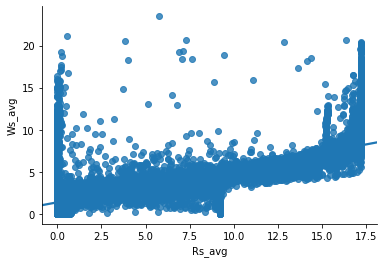

In [30]:
sns.regplot(x='Rs_avg', y='Ws_avg', data=wf_R80711)
sns.despine();

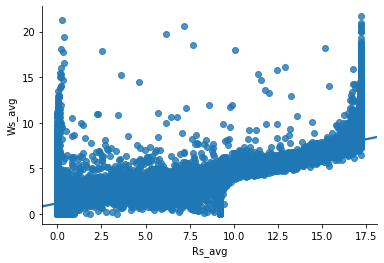

In [31]:
sns.regplot(x='Rs_avg', y='Ws_avg', data=wf_R80736)
sns.despine();

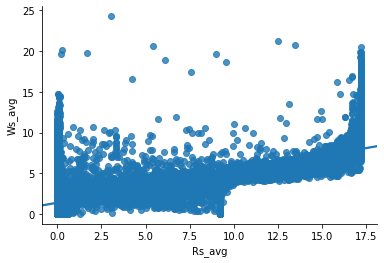

In [32]:
sns.regplot(x='Rs_avg', y='Ws_avg', data=wf_R80790)
sns.despine();

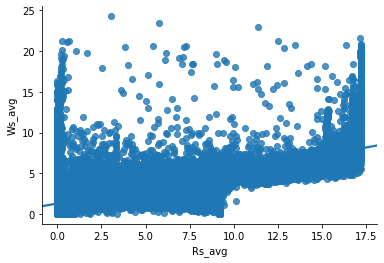

In [33]:
sns.regplot(x='Rs_avg', y='Ws_avg', data=windfarm)
sns.despine();

**This shows a bunch of outliers all over the place, but mostly on the low and high end of Rs_avg.**

## For Generator_converter_speed (DCs) and Generator_speed (Ds):
- we would expect a positive correlation between these

- Appears the most outliers come from R80711 and R80736

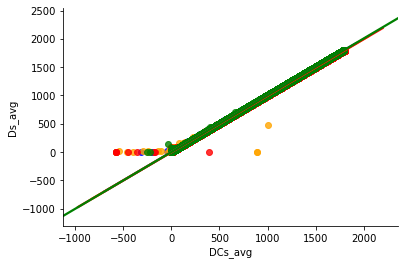

In [136]:
sns.regplot(x='DCs_avg', y='Ds_avg', data=wf_R80721, color='Blue')
sns.despine();

sns.regplot(x='DCs_avg', y='Ds_avg', data=wf_R80711, color='Orange')
sns.despine();

sns.regplot(x='DCs_avg', y='Ds_avg', data=wf_R80736, color='Red')
sns.despine();

sns.regplot(x='DCs_avg', y='Ds_avg', data=wf_R80790, color='Green')
sns.despine();

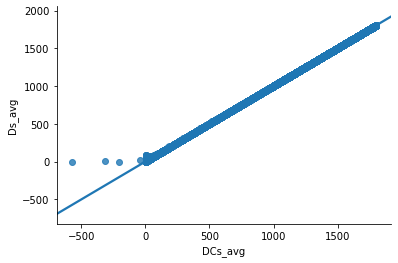

In [34]:
sns.regplot(x='DCs_avg', y='Ds_avg', data=wf_R80721)
sns.despine();

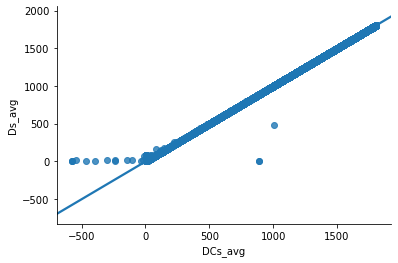

In [35]:
sns.regplot(x='DCs_avg', y='Ds_avg', data=wf_R80711)
sns.despine();

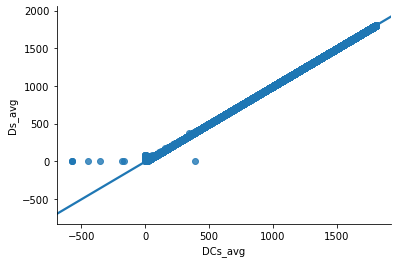

In [36]:
sns.regplot(x='DCs_avg', y='Ds_avg', data=wf_R80736)
sns.despine();

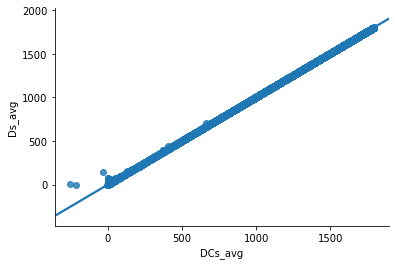

In [37]:
sns.regplot(x='DCs_avg', y='Ds_avg', data=wf_R80790)
sns.despine();

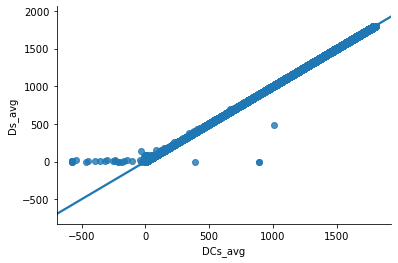

In [38]:
sns.regplot(x='DCs_avg', y='Ds_avg', data=windfarm)
sns.despine();

**There are a bunch of outliers on the low end.**

## Power_factor (Cosphi):

- Should equal Active_power/Apparent_power (P/S)

- As P increases, so should Cosphi

- The outliers are sprinkled together

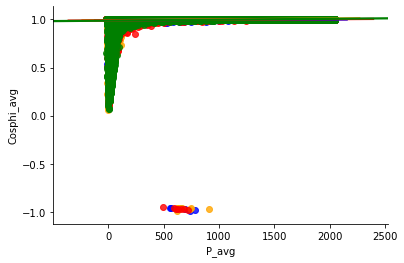

In [135]:
sns.regplot(x='P_avg', y='Cosphi_avg', data=wf_R80721, color='Blue')
sns.despine();

sns.regplot(x='P_avg', y='Cosphi_avg', data=wf_R80711, color='Orange')
sns.despine();

sns.regplot(x='P_avg', y='Cosphi_avg', data=wf_R80736, color='Red')
sns.despine();

sns.regplot(x='P_avg', y='Cosphi_avg', data=wf_R80790, color='Green')
sns.despine();

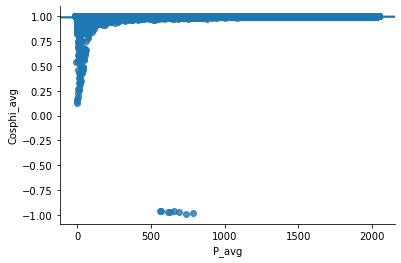

In [39]:
sns.regplot(x='P_avg', y='Cosphi_avg', data=wf_R80721)
sns.despine();

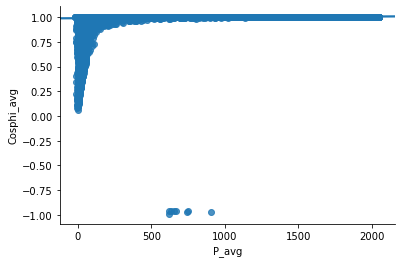

In [40]:
sns.regplot(x='P_avg', y='Cosphi_avg', data=wf_R80711)
sns.despine();

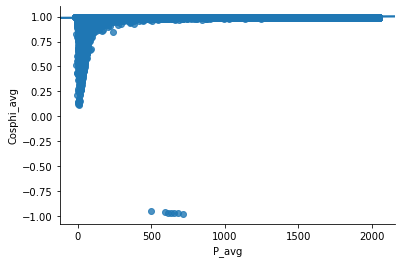

In [41]:
sns.regplot(x='P_avg', y='Cosphi_avg', data=wf_R80736)
sns.despine();

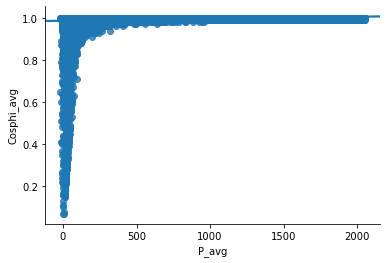

In [42]:
sns.regplot(x='P_avg', y='Cosphi_avg', data=wf_R80790)
sns.despine();

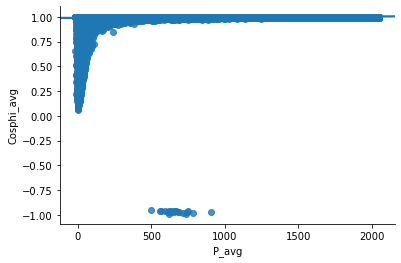

In [43]:
sns.regplot(x='P_avg', y='Cosphi_avg', data=windfarm)
sns.despine();

**There's a lot of outliers here too. Especially on the low end of P_avg.**

## Torque (Rm) and Converter_torque (Cm):
- should have positive correlation
- Most outliers come from R80711 & R80736

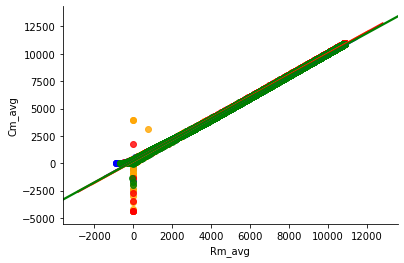

In [134]:
sns.regplot(x='Rm_avg', y='Cm_avg', data=wf_R80721, color='Blue')
sns.despine();

sns.regplot(x='Rm_avg', y='Cm_avg', data=wf_R80711, color='Orange')
sns.despine();

sns.regplot(x='Rm_avg', y='Cm_avg', data=wf_R80736, color='Red')
sns.despine();

sns.regplot(x='Rm_avg', y='Cm_avg', data=wf_R80790, color='Green')
sns.despine();

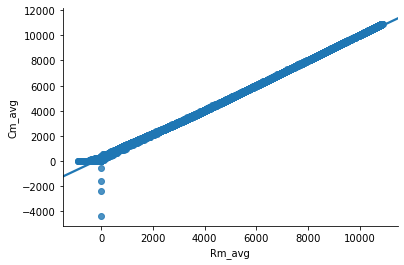

In [44]:
sns.regplot(x='Rm_avg', y='Cm_avg', data=wf_R80721)
sns.despine();

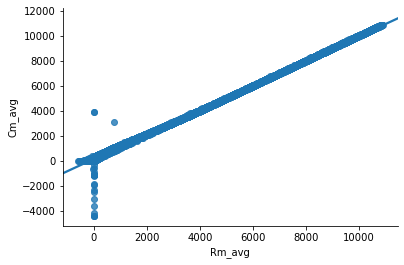

In [45]:
sns.regplot(x='Rm_avg', y='Cm_avg', data=wf_R80711)
sns.despine();

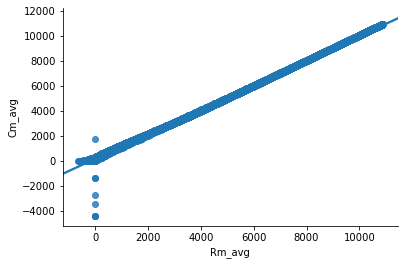

In [46]:
sns.regplot(x='Rm_avg', y='Cm_avg', data=wf_R80736)
sns.despine();

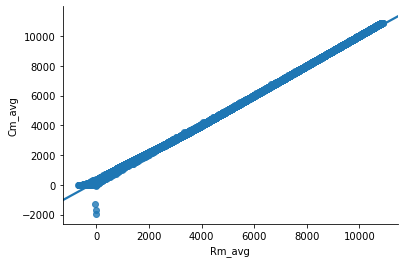

In [47]:
sns.regplot(x='Rm_avg', y='Cm_avg', data=wf_R80790)
sns.despine();

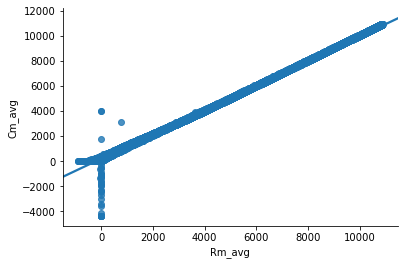

In [48]:
sns.regplot(x='Rm_avg', y='Cm_avg', data=windfarm)
sns.despine();

**There are a bunch of outliers on the low end.**

[Data Descriptions](https://opendata-renewables.engie.com/explore/dataset/39490fd2-04a2-4622-9042-ce4dd34c2a58/information)

### Absolute_wind_direction	deg	(Wa) & Absolute_wind_direction_corrected	deg (Wa_c)

- Sprinkling of outliers, but no one turbine stands out more than the others

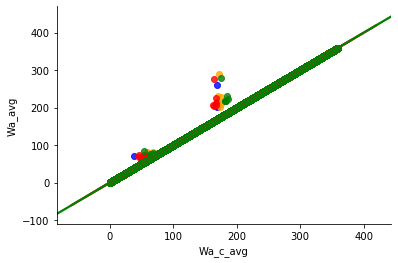

In [138]:
sns.regplot(y='Wa_avg',  x='Wa_c_avg', data=wf_R80721, color='Blue')
sns.despine();

sns.regplot(y='Wa_avg', x='Wa_c_avg', data=wf_R80711, color='Orange')
sns.despine();

sns.regplot(y='Wa_avg', x='Wa_c_avg', data=wf_R80736, color='Red')
sns.despine();

sns.regplot(y='Wa_avg', x='Wa_c_avg', data=wf_R80790, color='Green')
sns.despine();

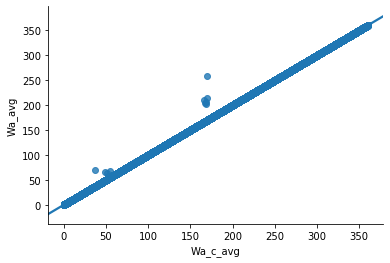

In [49]:
sns.regplot(y='Wa_avg', x='Wa_c_avg', data=wf_R80721)
sns.despine();

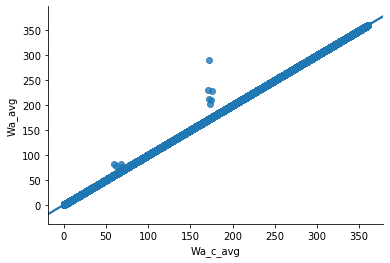

In [50]:
sns.regplot(y='Wa_avg', x='Wa_c_avg', data=wf_R80711)
sns.despine();

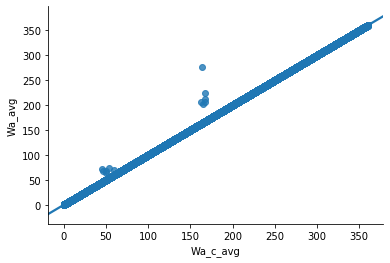

In [51]:
sns.regplot(y='Wa_avg', x='Wa_c_avg', data=wf_R80736)
sns.despine();

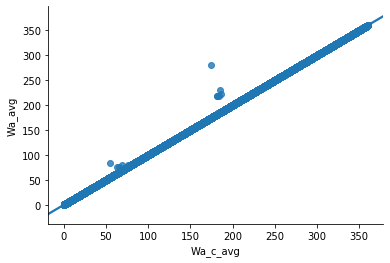

In [52]:
sns.regplot(y='Wa_avg', x='Wa_c_avg', data=wf_R80790)
sns.despine();

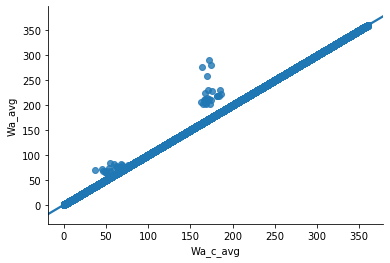

In [53]:
sns.regplot(y='Wa_avg', x='Wa_c_avg', data=windfarm)
sns.despine();

### (Average) Wind_speed (Ws) in m/s & Wind_speed_1 (Ws1) of the First anemometer on the nacelle in m/s

- No major outliers here

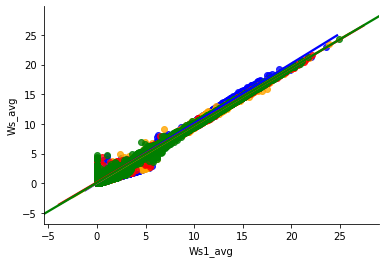

In [132]:
sns.regplot(y='Ws_avg', x='Ws1_avg',data=wf_R80721, color='Blue')
sns.despine();

sns.regplot(y='Ws_avg', x='Ws1_avg', data=wf_R80711, color='Orange')
sns.despine();

sns.regplot(y='Ws_avg', x='Ws1_avg', data=wf_R80736, color='Red')
sns.despine();

sns.regplot(y='Ws_avg', x='Ws1_avg', data=wf_R80790, color='Green')
sns.despine();

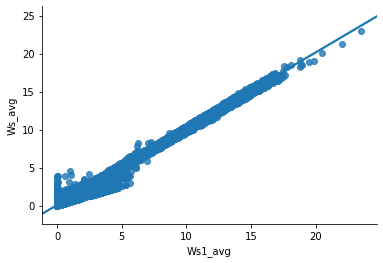

In [54]:
sns.regplot(y='Ws_avg', x='Ws1_avg', data=wf_R80721)
sns.despine();

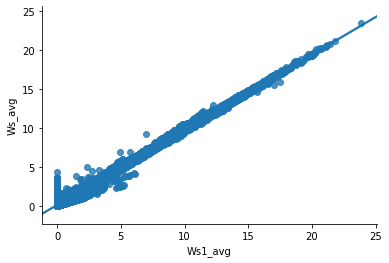

In [55]:
sns.regplot(y='Ws_avg', x='Ws1_avg', data=wf_R80711)
sns.despine();

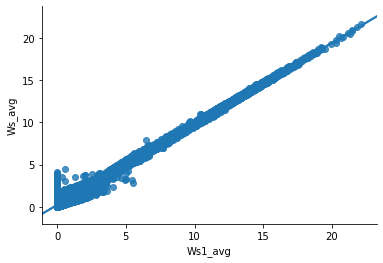

In [56]:
sns.regplot(y='Ws_avg', x='Ws1_avg', data=wf_R80736)
sns.despine();

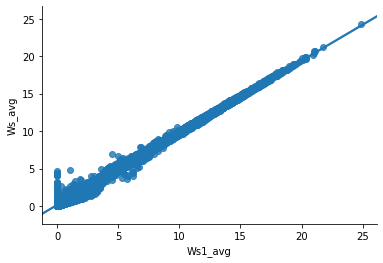

In [57]:
sns.regplot(y='Ws_avg', x='Ws1_avg', data=wf_R80790)
sns.despine();

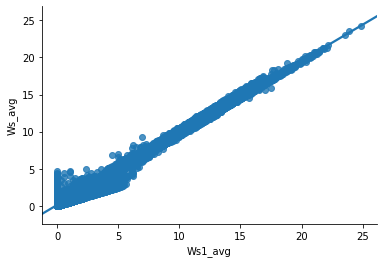

In [58]:
sns.regplot(y='Ws_avg', x='Ws1_avg', data=windfarm)
sns.despine();

### (Average) Wind_speed (Ws) in m/s & Wind_speed_2 (Ws2) of the Second anemometer on the nacelle in m/s

- Outliers from R80721

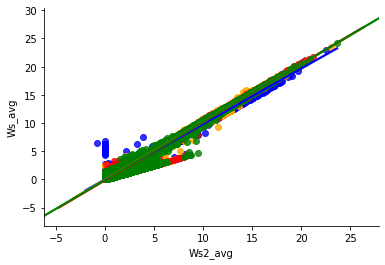

In [131]:
sns.regplot(y='Ws_avg', x='Ws2_avg',data=wf_R80721, color='Blue')
sns.despine();

sns.regplot(y='Ws_avg', x='Ws2_avg', data=wf_R80711, color='Orange')
sns.despine();

sns.regplot(y='Ws_avg', x='Ws2_avg', data=wf_R80736, color='Red')
sns.despine();

sns.regplot(y='Ws_avg', x='Ws2_avg', data=wf_R80790, color='Green')
sns.despine();

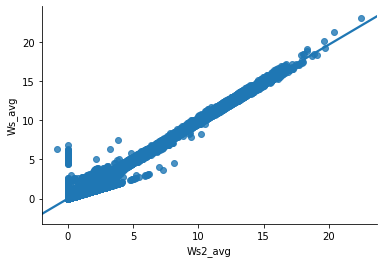

In [59]:
sns.regplot(y='Ws_avg', x='Ws2_avg', data=wf_R80721)
sns.despine();

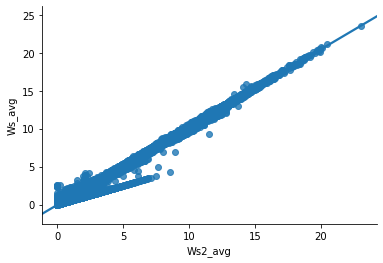

In [60]:
sns.regplot(y='Ws_avg', x='Ws2_avg', data=wf_R80711)
sns.despine();

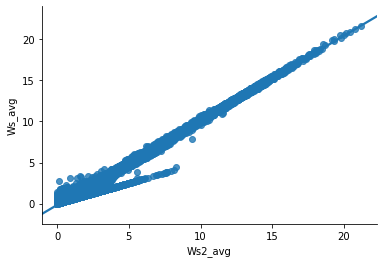

In [61]:
sns.regplot(y='Ws_avg', x='Ws2_avg', data=wf_R80736)
sns.despine();

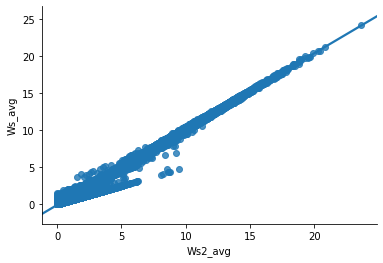

In [62]:
sns.regplot(y='Ws_avg', x='Ws2_avg', data=wf_R80790)
sns.despine();

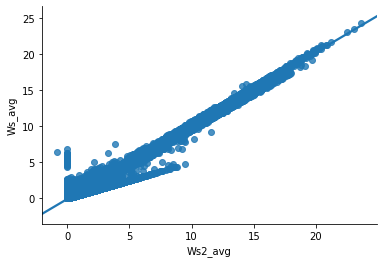

In [63]:
sns.regplot(y='Ws_avg', x='Ws2_avg', data=windfarm)
sns.despine();

### Wind_speed_1 (Ws1) of the First anemometer on the nacelle in m/s & Wind_speed_2 (Ws2) of the Second anemometer on the nacelle in m/s

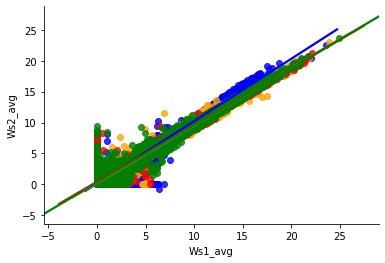

In [130]:
sns.regplot(x='Ws1_avg', y='Ws2_avg', data=wf_R80721, color='Blue')
sns.despine();

sns.regplot(x='Ws1_avg', y='Ws2_avg', data=wf_R80711, color='Orange')
sns.despine();

sns.regplot(x='Ws1_avg', y='Ws2_avg', data=wf_R80736, color='Red')
sns.despine();

sns.regplot(x='Ws1_avg', y='Ws2_avg', data=wf_R80790, color='Green')
sns.despine();

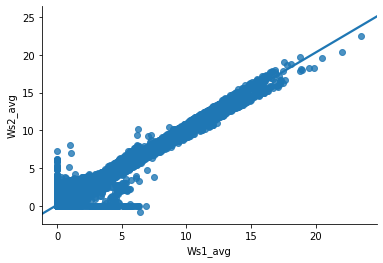

In [64]:
sns.regplot(x='Ws1_avg', y='Ws2_avg', data=wf_R80721)
sns.despine();

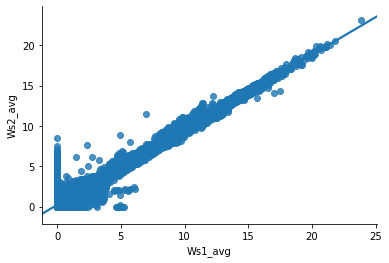

In [65]:
sns.regplot(x='Ws1_avg', y='Ws2_avg', data=wf_R80711)
sns.despine();

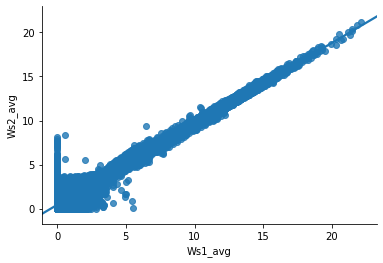

In [66]:
sns.regplot(x='Ws1_avg', y='Ws2_avg', data=wf_R80736)
sns.despine();

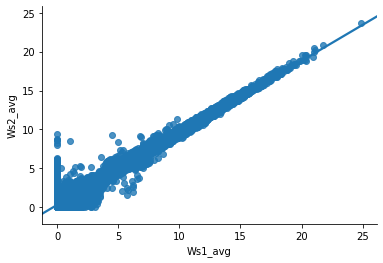

In [67]:
sns.regplot(x='Ws1_avg', y='Ws2_avg', data=wf_R80790)
sns.despine();

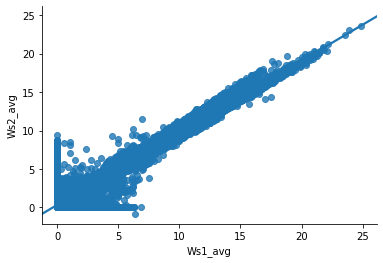

In [68]:
sns.regplot(x='Ws1_avg', y='Ws2_avg', data=windfarm)
sns.despine();

### Vane_position (Va) in degrees and Vane_position_1 (Va1) in degrees (First wind vane on the nacelle)

- **__No outliers here!__**

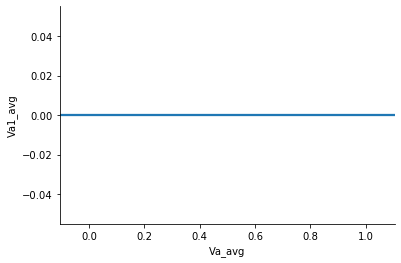

In [69]:
sns.regplot(x='Va_avg', y='Va1_avg', data=wf_R80721)
sns.despine();

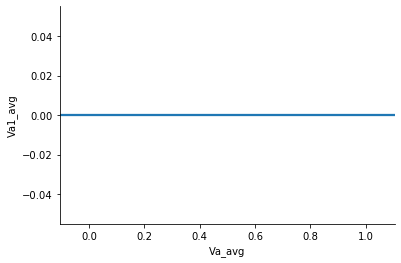

In [70]:
sns.regplot(x='Va_avg', y='Va1_avg', data=wf_R80711)
sns.despine();

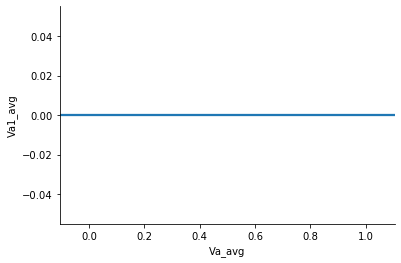

In [71]:
sns.regplot(x='Va_avg', y='Va1_avg', data=wf_R80736)
sns.despine();

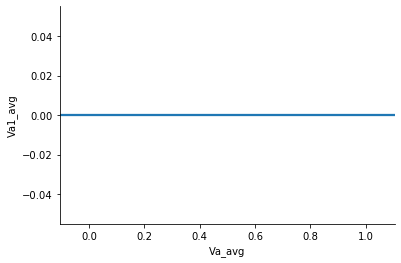

In [72]:
sns.regplot(x='Va_avg', y='Va1_avg', data=wf_R80790)
sns.despine();

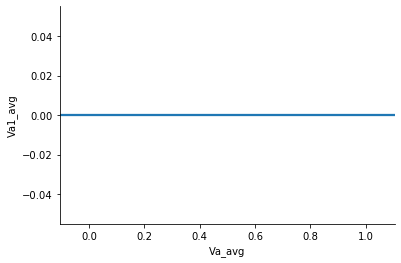

In [73]:
sns.regplot(x='Va_avg', y='Va1_avg', data=windfarm)
sns.despine();

### Vane_position (Va) in degrees and Vane_position_2 (Va2) in degrees (Second wind vane on the nacelle)

- **__No outliers here!__**

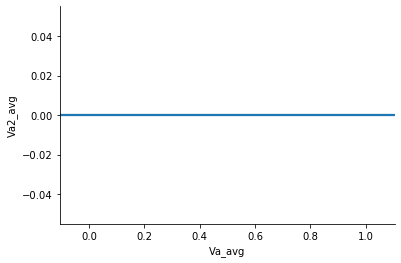

In [74]:
sns.regplot(x='Va_avg', y='Va2_avg', data=wf_R80721)
sns.despine();

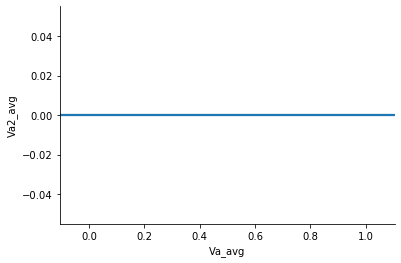

In [75]:
sns.regplot(x='Va_avg', y='Va2_avg', data=wf_R80711)
sns.despine();

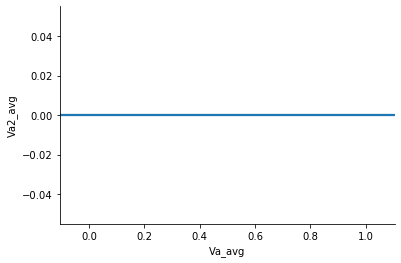

In [76]:
sns.regplot(x='Va_avg', y='Va2_avg', data=wf_R80736)
sns.despine();

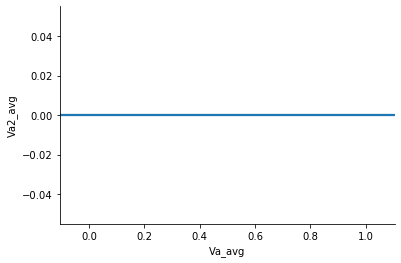

In [77]:
sns.regplot(x='Va_avg', y='Va2_avg', data=wf_R80790)
sns.despine();

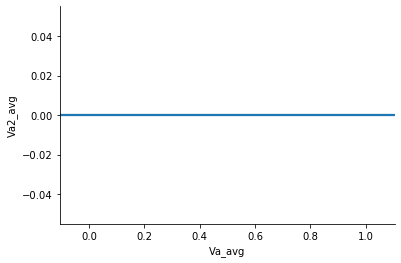

In [78]:
sns.regplot(x='Va_avg', y='Va2_avg', data=windfarm)
sns.despine();

### Vane_position_1 (Va1) in degrees (First wind vane on the nacelle) & Vane_position_2 (Va2) in degrees (Second wind vane on the nacelle)

- **__No outliers here!__**

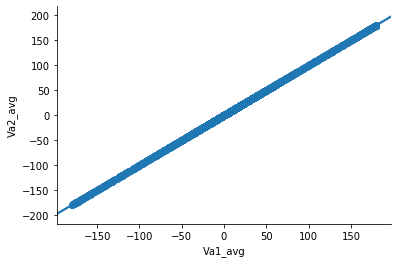

In [79]:
sns.regplot(x='Va1_avg', y='Va2_avg', data=wf_R80721)
sns.despine();

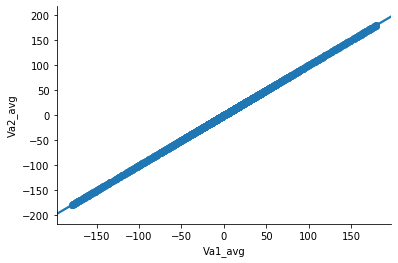

In [80]:
sns.regplot(x='Va1_avg', y='Va2_avg', data=wf_R80711)
sns.despine();

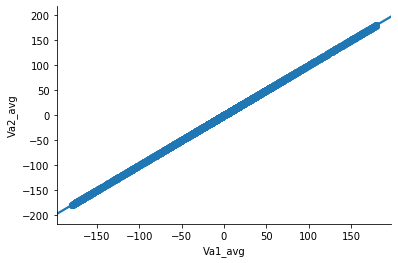

In [81]:
sns.regplot(x='Va1_avg', y='Va2_avg', data=wf_R80736)
sns.despine();

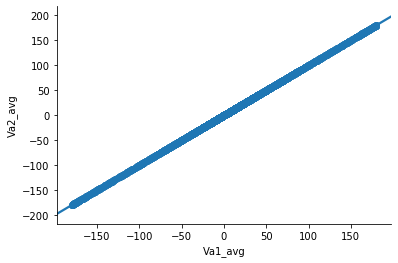

In [82]:
sns.regplot(x='Va1_avg', y='Va2_avg', data=wf_R80790)
sns.despine();

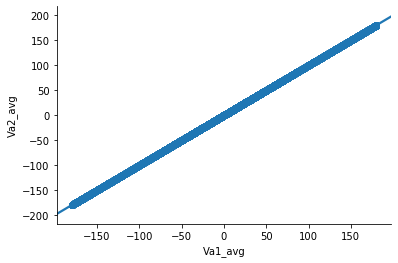

In [83]:
sns.regplot(x='Va1_avg', y='Va2_avg', data=windfarm)
sns.despine();

### Generator_bearing_1_temperature (Db1t) in deg_C & Generator_bearing_2_temperature (Db2t) in deg_C

- Most outliers from R80721 & one big one from R80790 (80*C for Db1t_avg & 250*C Db2t_avg)

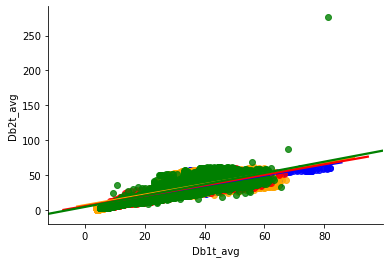

In [129]:
sns.regplot(x='Db1t_avg', y='Db2t_avg', data=wf_R80721, color='Blue')
sns.despine();

sns.regplot(x='Db1t_avg', y='Db2t_avg', data=wf_R80711, color='Orange')
sns.despine();

sns.regplot(x='Db1t_avg', y='Db2t_avg', data=wf_R80736, color='Red')
sns.despine();

sns.regplot(x='Db1t_avg', y='Db2t_avg', data=wf_R80790, color='Green')
sns.despine();

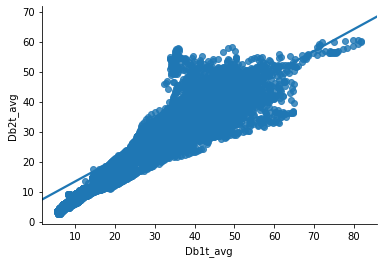

In [84]:
sns.regplot(x='Db1t_avg', y='Db2t_avg', data=wf_R80721)
sns.despine();

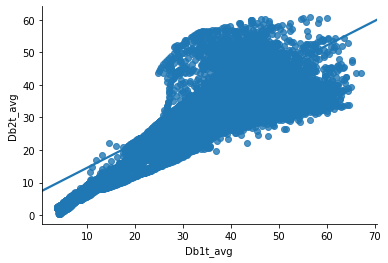

In [85]:
sns.regplot(x='Db1t_avg', y='Db2t_avg', data=wf_R80711)
sns.despine();

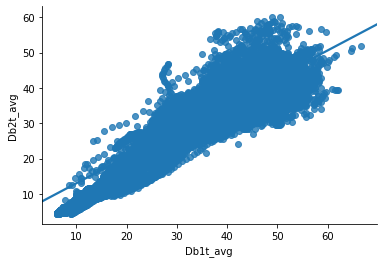

In [86]:
sns.regplot(x='Db1t_avg', y='Db2t_avg', data=wf_R80736)
sns.despine();

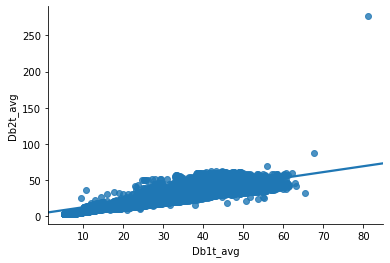

In [87]:
sns.regplot(x='Db1t_avg', y='Db2t_avg', data=wf_R80790)
sns.despine();

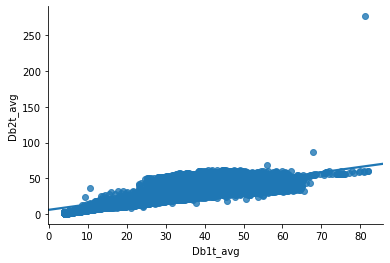

In [88]:
sns.regplot(x='Db1t_avg', y='Db2t_avg', data=windfarm)
sns.despine();

### Gearbox_inlet_temperature (Git) in deg_C and Gearbox_oil_sump_temperature (Gost) in deg_C

- Most outliers come from R80711

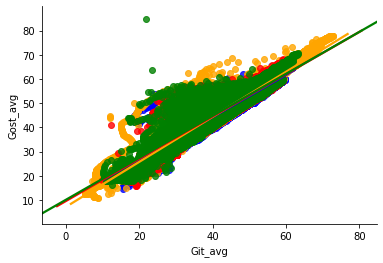

In [127]:
sns.regplot(x='Git_avg', y='Gost_avg', data=wf_R80721, color='Blue')
sns.despine();

sns.regplot(x='Git_avg', y='Gost_avg', data=wf_R80711, color='Orange')
sns.despine();

sns.regplot(x='Git_avg', y='Gost_avg', data=wf_R80736, color='Red')
sns.despine();

sns.regplot(x='Git_avg', y='Gost_avg', data=wf_R80790, color='Green')
sns.despine();

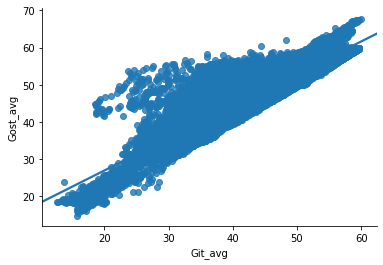

In [89]:
sns.regplot(x='Git_avg', y='Gost_avg', data=wf_R80721)
sns.despine();

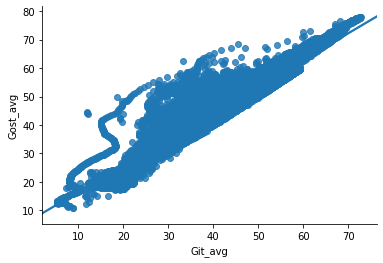

In [90]:
sns.regplot(x='Git_avg', y='Gost_avg', data=wf_R80711)
sns.despine();

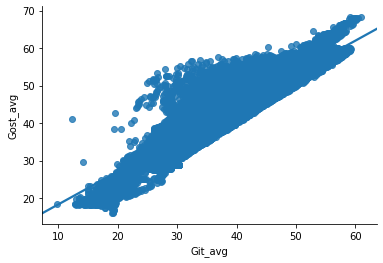

In [91]:
sns.regplot(x='Git_avg', y='Gost_avg', data=wf_R80736)
sns.despine();

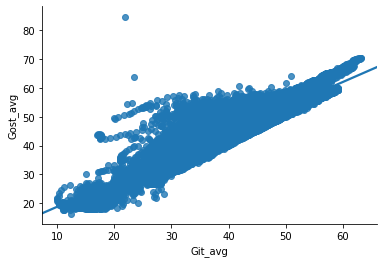

In [92]:
sns.regplot(x='Git_avg', y='Gost_avg', data=wf_R80790)
sns.despine();

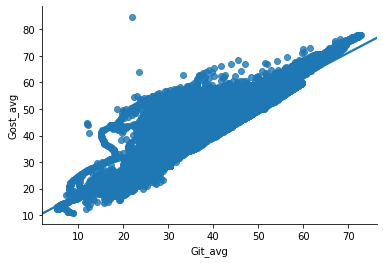

In [93]:
sns.regplot(x='Git_avg', y='Gost_avg', data=windfarm)
sns.despine();

### Grid_frequency (Nf) in Hz & Grid_voltage (Nu) in V

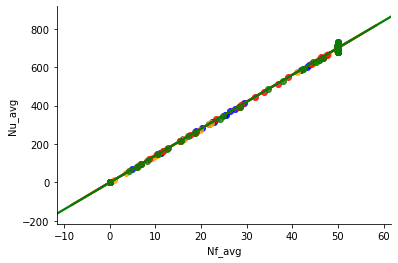

In [128]:
sns.regplot(x='Nf_avg', y='Nu_avg', data=wf_R80721, color='Blue')
sns.despine();

sns.regplot(x='Nf_avg', y='Nu_avg', data=wf_R80711, color='Orange')
sns.despine();

sns.regplot(x='Nf_avg', y='Nu_avg', data=wf_R80736, color='Red')
sns.despine();

sns.regplot(x='Nf_avg', y='Nu_avg', data=wf_R80790, color='Green')
sns.despine();

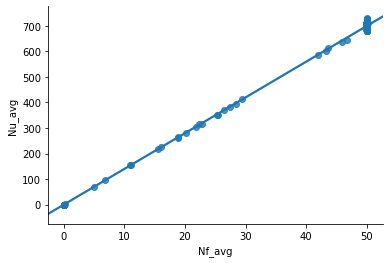

In [94]:
sns.regplot(x='Nf_avg', y='Nu_avg', data=wf_R80721)
sns.despine();

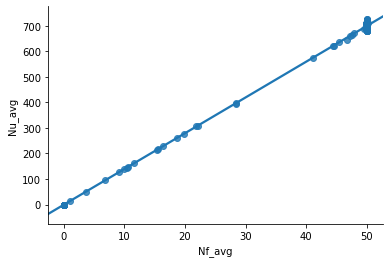

In [95]:
sns.regplot(x='Nf_avg', y='Nu_avg', data=wf_R80711)
sns.despine();

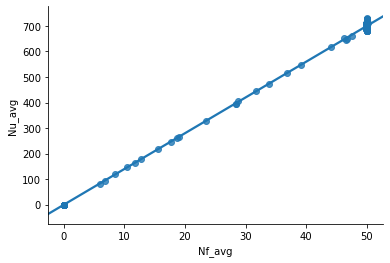

In [96]:
sns.regplot(x='Nf_avg', y='Nu_avg', data=wf_R80736)
sns.despine();

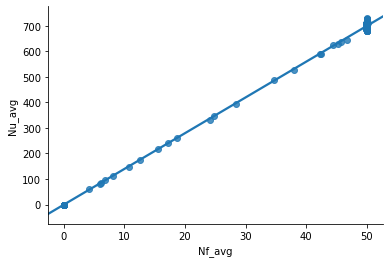

In [97]:
sns.regplot(x='Nf_avg', y='Nu_avg', data=wf_R80790)
sns.despine();

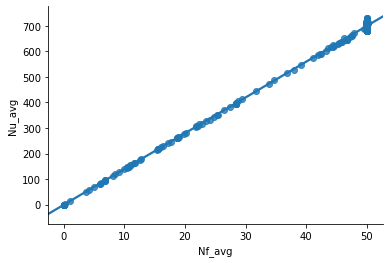

In [98]:
sns.regplot(x='Nf_avg', y='Nu_avg', data=windfarm)
sns.despine();

### Power Output (P) vs. Wind Speed (Ws)

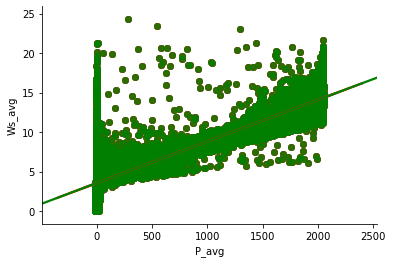

In [126]:
sns.regplot(y=windfarm['Ws_avg'], x=windfarm['P_avg'], data=wf_R80721, color='Blue')
sns.despine();

sns.regplot(y=windfarm['Ws_avg'], x=windfarm['P_avg'], data=wf_R80711, color='Orange')
sns.despine();

sns.regplot(y=windfarm['Ws_avg'], x=windfarm['P_avg'], data=wf_R80736, color='Red')
sns.despine();

sns.regplot(y=windfarm['Ws_avg'], x=windfarm['P_avg'], data=wf_R80790, color='Green')
sns.despine();

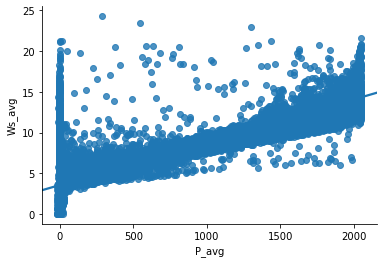

In [99]:
sns.regplot(y=windfarm['Ws_avg'], x=windfarm['P_avg'], data=wf_R80721)
sns.despine();

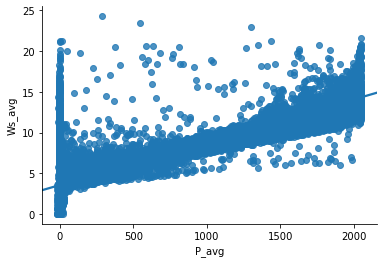

In [100]:
sns.regplot(y=windfarm['Ws_avg'], x=windfarm['P_avg'], data=wf_R80711)
sns.despine();

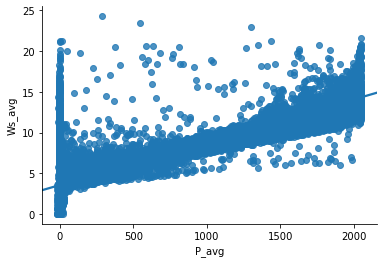

In [101]:
sns.regplot(y=windfarm['Ws_avg'], x=windfarm['P_avg'], data=wf_R80736)
sns.despine();

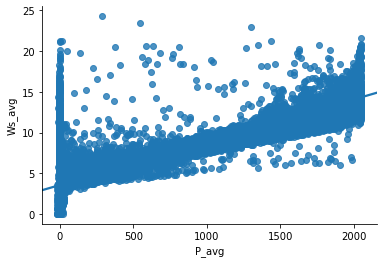

In [102]:
sns.regplot(y=windfarm['Ws_avg'], x=windfarm['P_avg'], data=wf_R80790)
sns.despine();

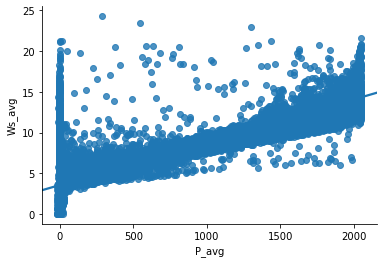

In [103]:
sns.regplot(y=windfarm['Ws_avg'], x=windfarm['P_avg'], data=windfarm)
sns.despine();

### Power Output (P) vs. Wind_speed_1 (Ws1)

- **__No outliers here!__**

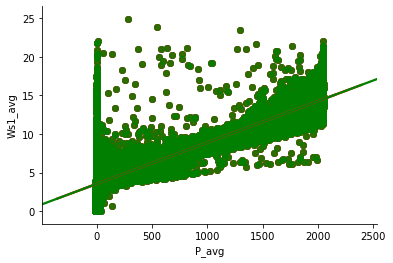

In [125]:
sns.regplot(y=windfarm['Ws1_avg'], x=windfarm['P_avg'], data=wf_R80721, color='Blue')
sns.despine();

sns.regplot(y=windfarm['Ws1_avg'], x=windfarm['P_avg'], data=wf_R80711, color='Orange')
sns.despine();

sns.regplot(y=windfarm['Ws1_avg'], x=windfarm['P_avg'], data=wf_R80736, color='Red')
sns.despine();

sns.regplot(y=windfarm['Ws1_avg'], x=windfarm['P_avg'], data=wf_R80790, color='Green')
sns.despine();

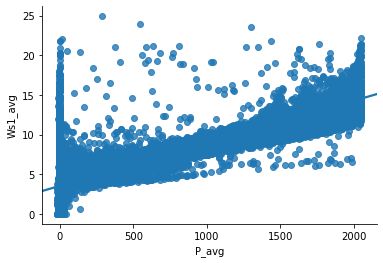

In [104]:
sns.regplot(y=windfarm['Ws1_avg'], x=windfarm['P_avg'], data=wf_R80721)
sns.despine();

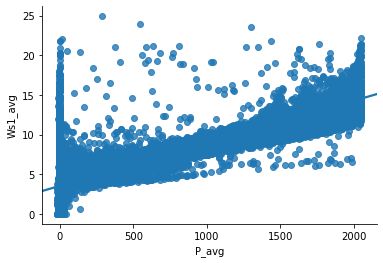

In [105]:
sns.regplot(y=windfarm['Ws1_avg'], x=windfarm['P_avg'], data=wf_R80711)
sns.despine();

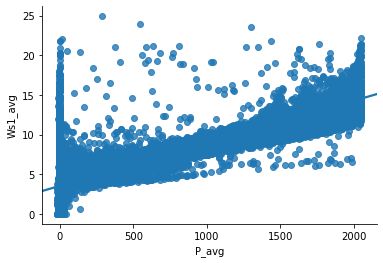

In [106]:
sns.regplot(y=windfarm['Ws1_avg'], x=windfarm['P_avg'], data=wf_R80736)
sns.despine();

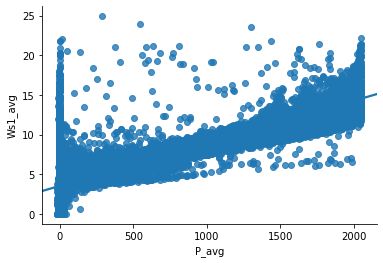

In [107]:
sns.regplot(y=windfarm['Ws1_avg'], x=windfarm['P_avg'], data=wf_R80790)
sns.despine();

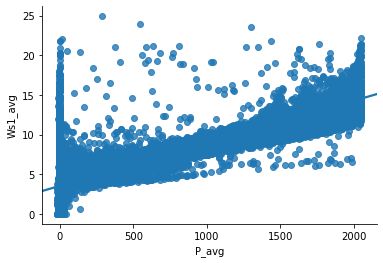

In [108]:
sns.regplot(y=windfarm['Ws1_avg'], x=windfarm['P_avg'], data=windfarm)
sns.despine();

### Power Output (P) vs. Wind_speed_2 (Ws2)

- **__No outliers here!__**

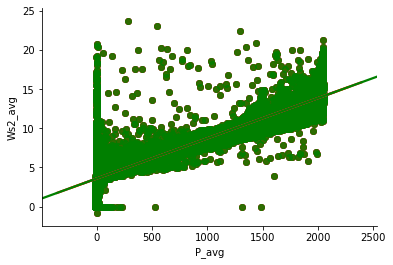

In [124]:
sns.regplot(y=windfarm['Ws2_avg'], x=windfarm['P_avg'], data=wf_R80721, color='Blue')
sns.despine();

sns.regplot(y=windfarm['Ws2_avg'], x=windfarm['P_avg'], data=wf_R80711, color='Orange')
sns.despine();

sns.regplot(y=windfarm['Ws2_avg'], x=windfarm['P_avg'], data=wf_R80736, color='Red')
sns.despine();

sns.regplot(y=windfarm['Ws2_avg'], x=windfarm['P_avg'], data=wf_R80790, color='Green')
sns.despine();

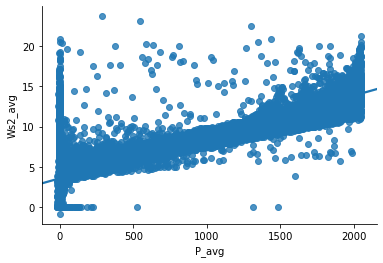

In [109]:
sns.regplot(y=windfarm['Ws2_avg'], x=windfarm['P_avg'], data=wf_R80721)
sns.despine();

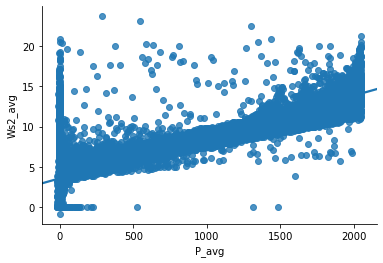

In [110]:
sns.regplot(y=windfarm['Ws2_avg'], x=windfarm['P_avg'], data=wf_R80711)
sns.despine();

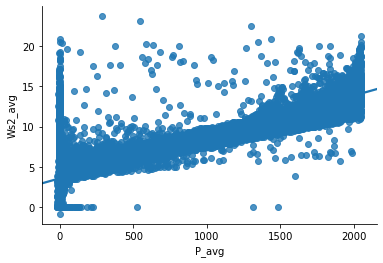

In [111]:
sns.regplot(y=windfarm['Ws2_avg'], x=windfarm['P_avg'], data=wf_R80736)
sns.despine();

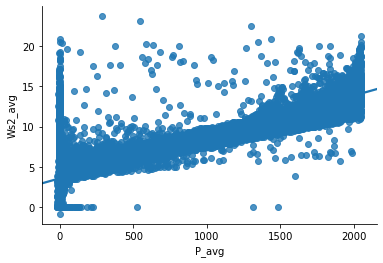

In [112]:
sns.regplot(y=windfarm['Ws2_avg'], x=windfarm['P_avg'], data=wf_R80790)
sns.despine();

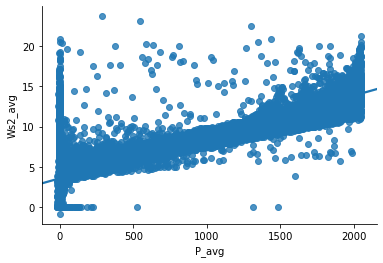

In [113]:
sns.regplot(y=windfarm['Ws2_avg'], x=windfarm['P_avg'], data=windfarm)
sns.despine();